<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [0]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-15 21:19:29--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.102, 74.125.204.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-3s-docs.googleusercontent.com/docs/securesc/thp2a1e1i46ifket2ojttne2m5i5pdu3/dgq7rgq069636ir59m66jkv7gvb7pjb1/1589577525000/11146100322577758036/02962717554273411368Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-15 21:19:30--  https://doc-0k-3s-docs.googleusercontent.com/docs/securesc/thp2a1e1i46ifket2ojttne2m5i5pdu3/dgq7rgq069636ir59m66jkv7gvb7pjb1/1589577525000/11146100322577758036/02962717554273411368Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-0k-3s-docs.googleusercontent.com (doc-0k-3s-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to 

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import pandas as pd
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin
from sklearn.metrics import accuracy_score,confusion_matrix,jaccard_score

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

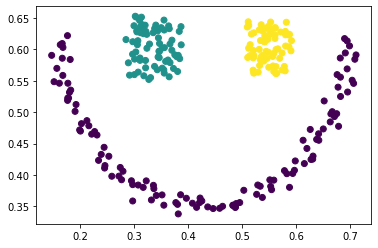

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:1.3321528434753418sg
Ari: 0.4391534391534392 y accuracy: 0.7777777777777778


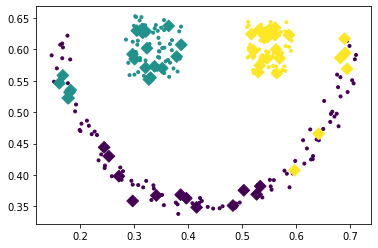

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:0.7679643630981445sg
Ari: 0.7324821852731591 y accuracy: 0.9074074074074074


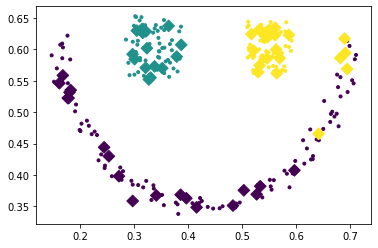

In [0]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.9882152080535889sg
Ari: 1.0 y accuracy: 1.0


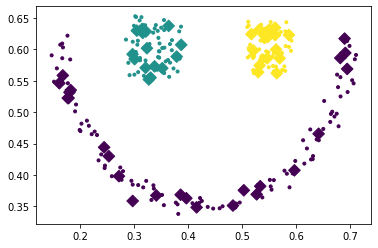

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',gamma_=500,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:0.9881839752197266sg
Ari: 1.0 y accuracy: 1.0


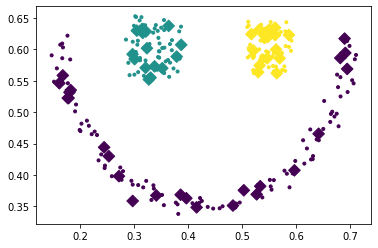

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.003,optimization='Adam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:0.9854397773742676sg
Ari: 1.0 y accuracy: 1.0


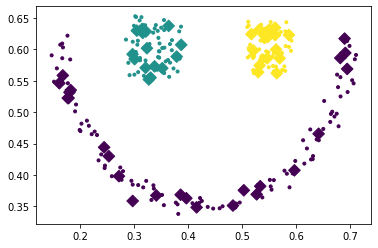

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.06073617935180664sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


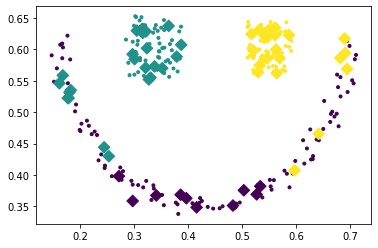

In [0]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.06536364555358887sg
Ari: 1.0 y accuracy: 1.0


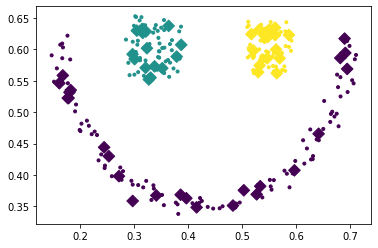

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

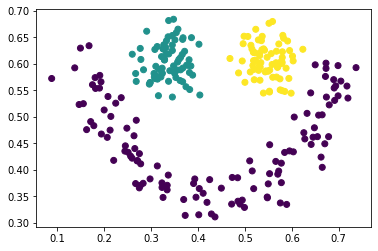

In [0]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:309: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:1.165635347366333sg
Ari: 0.46329113924050624 y accuracy: 0.7222222222222222


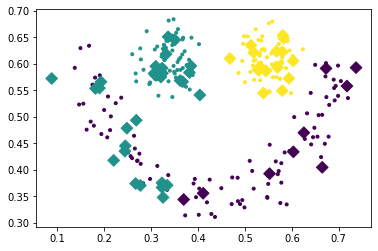

In [0]:
t = time.time()
p = PRI(lambda_=3, n_clusters=3, nn=5, sigma_initial=3,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.9717857837677002sg
Ari: 0.6120883012631331 y accuracy: 0.8518518518518519


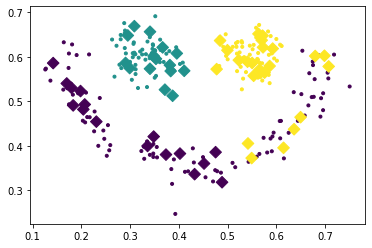

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',n_clusters=3,gamma_=500,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.060410261154174805sg
Ari: 0.779691211401425 y accuracy: 0.9259259259259259


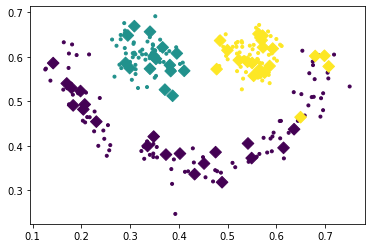

In [0]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

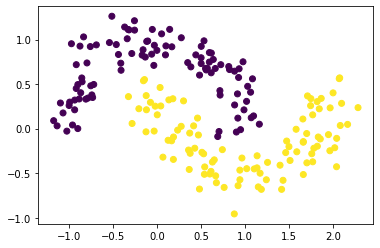

In [0]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =12
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8715758323669434sg
Ari: 0.5510163805012828 y accuracy: 0.875


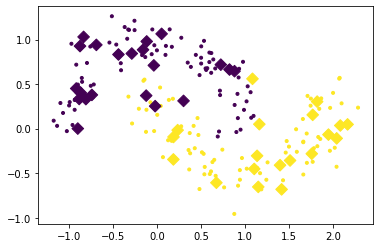

In [0]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:2.1454851627349854sg
Ari: 0.1879772860779323 y accuracy: 0.725


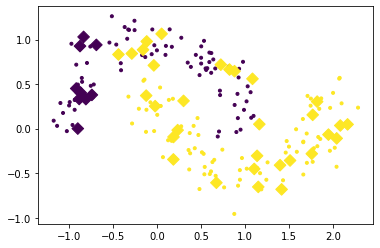

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=40,learning_rate=0.03,reduction_='SC',n_clusters=2)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.19028258323669434sg
Ari: 0.5517241379310345 y accuracy: 0.875


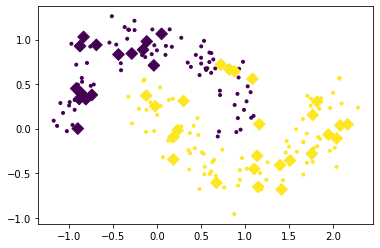

In [0]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[3,15,30],'rep__sigma_initial':[35],'rep__learning_rate':[0.001,0.003],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]

for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


**Moons**


In [0]:
#{'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
n_clusters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())],  
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[1,100,500],'rep__n_neighbors_':[5],'rep__nn_':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[5],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,15,30],'rep__sigma_initial':[40],'rep__learning_rate':[0.01,0.03],'rep__nn':[5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[1,100,500],'rep__optimization':['Nadam',None]}]

In [0]:
n=[5,15,30]
moons,labels_moons = datasets.make_moons(n_samples=200)
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_moons = np.mean(moons)
  avg_db = 10 * np.log10(avg_moons)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),moons.shape)
  noisy_moons=moons+noise_
  

  for i in range(len(steps)):
    #meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/moons' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_moons))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_moons,labels_moons,test_size=0.2, stratify=labels_moons)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=2)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar Resultados**
1. **Happy**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/happy'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

**Accuracy**

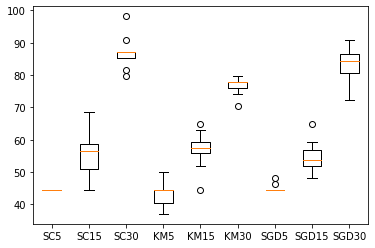

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

**ARI**

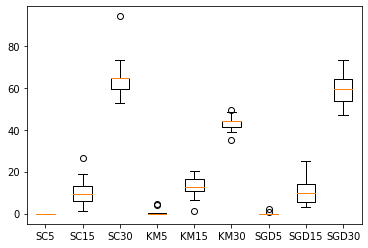

In [0]:
plt.boxplot(Rari,labels=meth2)
plt.show()

2. **Moons**

In [0]:
Racc=np.zeros((10,9))
Rari=np.zeros((10,9))
meth=['sc_5db','sc_15db','sc_30db','Knn5db','Knn15db','Knn30db','SGD5db','SGD15db','SGD30db']
meth2=['SC5','SC15','SC30','KM5','KM15','KM30','SGD5','SGD15','SGD30']
j=0
for i in meth:
  aux=load('/content/PRI/moons'+i+'.joblib')
  Racc[:,j]=aux['acc']
  Rari[:,j]=aux['ari']
  j+=1

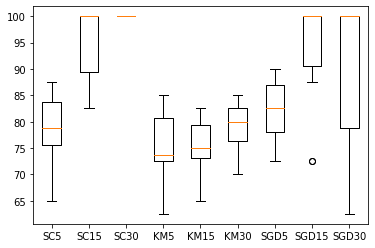

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

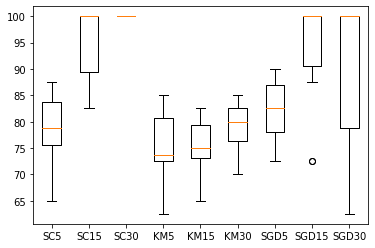

In [0]:
plt.boxplot(Racc,labels=meth2)
plt.show()

### **Parte 2. Real dataset**

In [0]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
sonar=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
ecoli=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data')
liver=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data')
ionosphere=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')

**Iris**

**Pre procesamiento de la base de datos**

In [0]:
iris,labels_iris=pre_process(iris)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    iris, labels_iris, test_size=0.2, stratify=labels_iris)

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=35,learning_rate=0.05,reduction_='SC',n_clusters=3,gamma_=10,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.3524487018585205sg
Ari: 0.667144906743185 y accuracy: 0.8666666666666667
Jacc: 0.7714285714285715 y Purity: 0.8666666666666667


**Sonar**

**Pre procesamiento de la base de datos**

In [0]:
sonar,labels_sonar=pre_process(sonar)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    sonar, labels_sonar, test_size=0.2, stratify=labels_sonar)

In [0]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=35,learning_rate=0.05,reduction_='SC',n_clusters=2,gamma_=10,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD)
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))

el tiempo requerido fue:0.6242084503173828sg
Ari: -0.003973223925717921 y accuracy: 0.5714285714285714
Jacc: 0.4 y Purity: 0.5714285714285714


**Wine**

**Pre procesamiento**

In [0]:
aux=wine['1']
wine=wine.drop(['1'],axis=1)
wine.insert(wine.shape[1],'1',aux)
wine,labels_wine=pre_process(wine)

**Pruebas**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    wine, labels_wine, test_size=0.2, stratify=labels_wine)

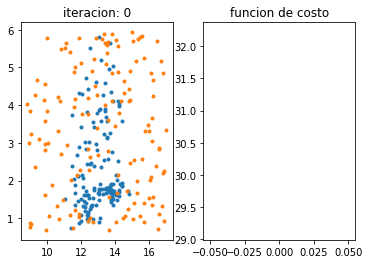

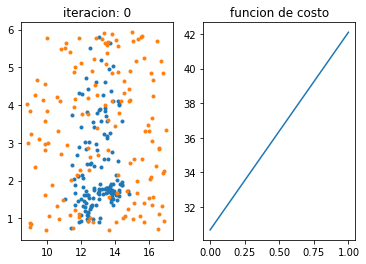

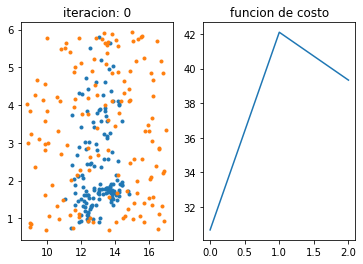

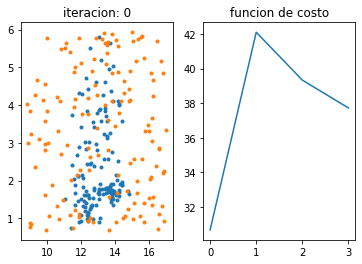

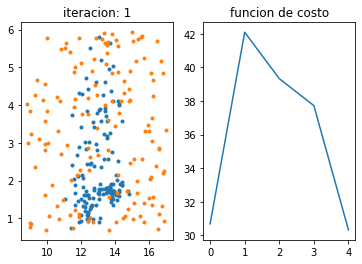

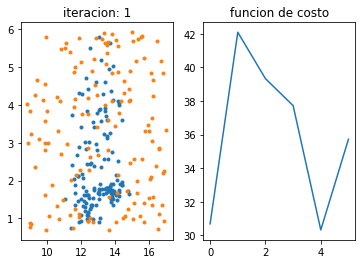

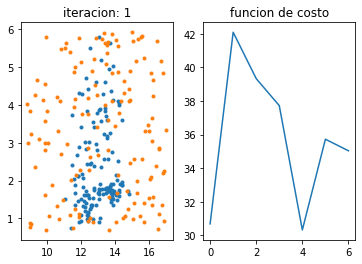

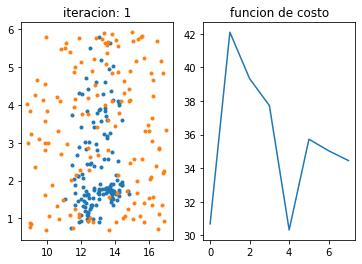

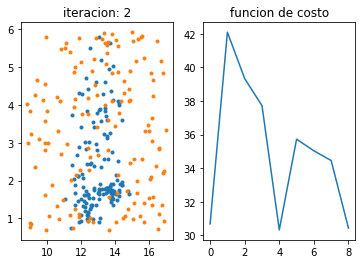

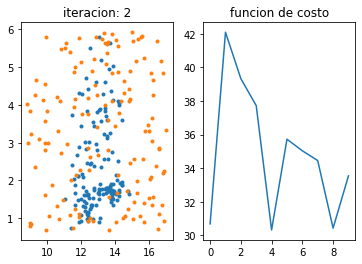

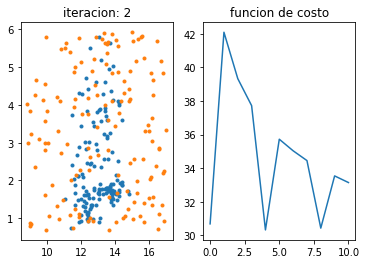

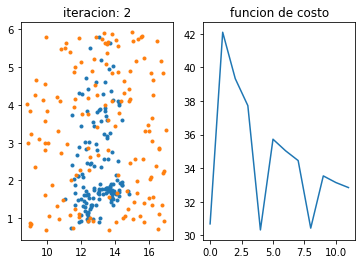

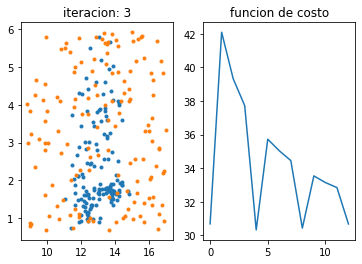

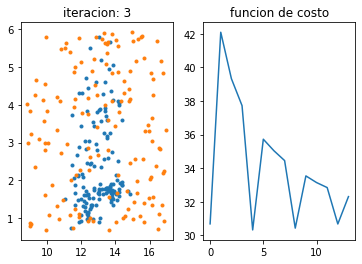

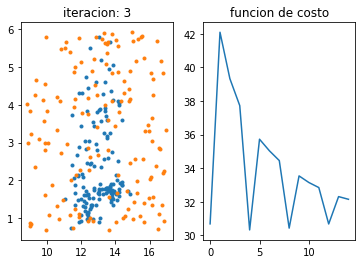

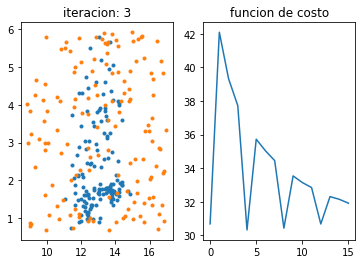

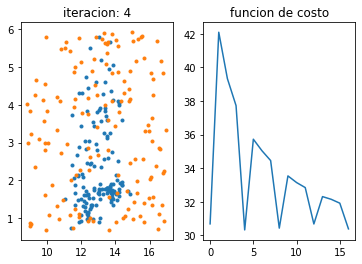

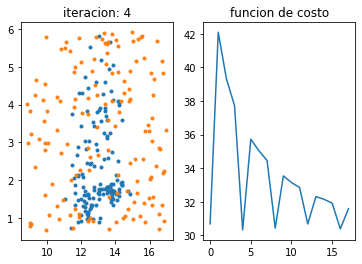

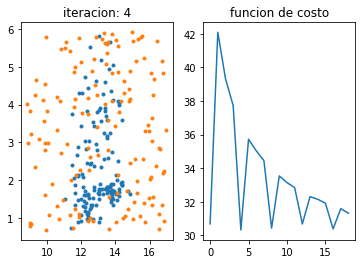

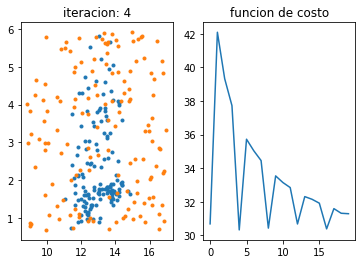

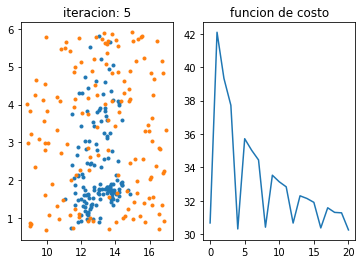

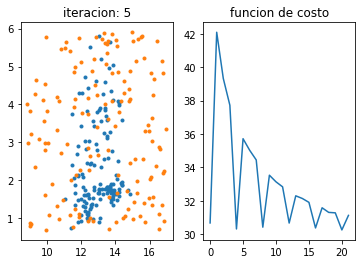

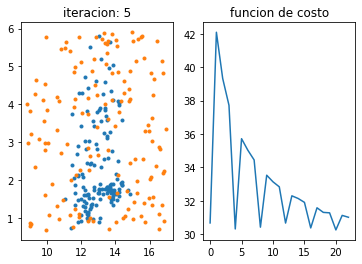

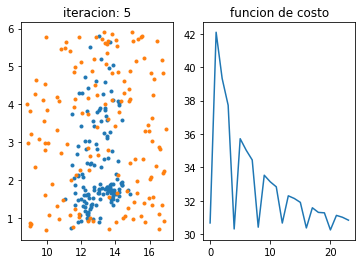

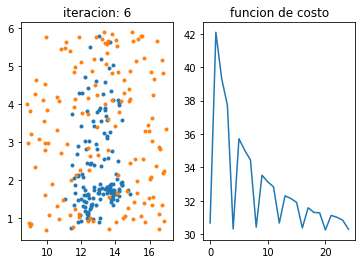

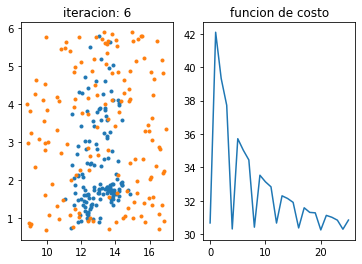

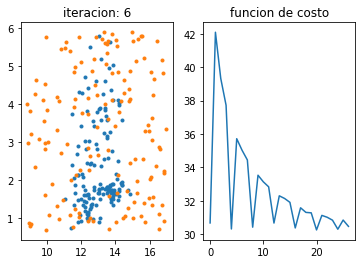

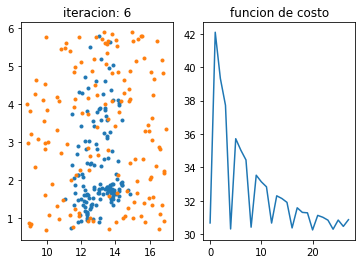

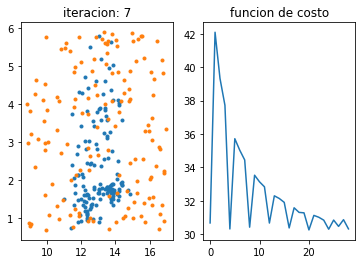

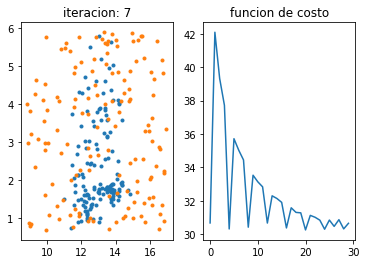

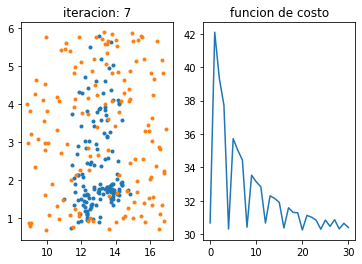

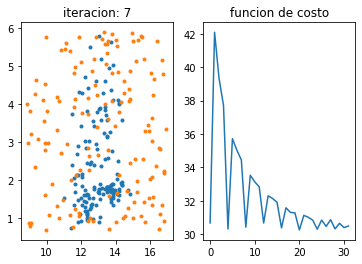

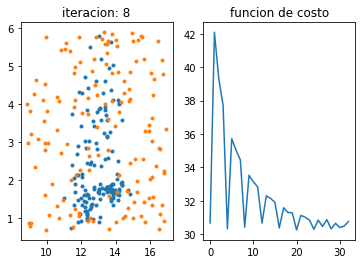

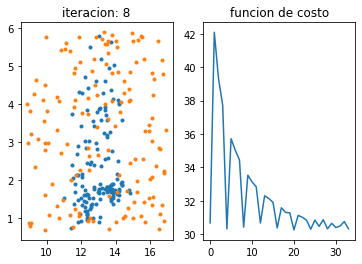

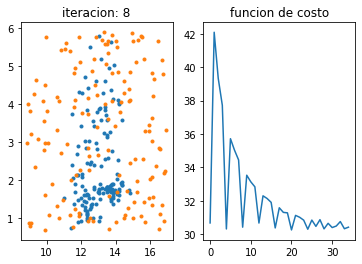

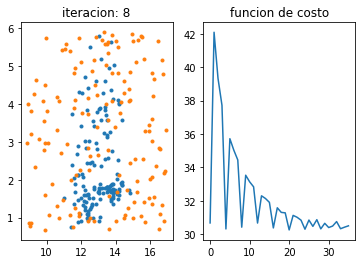

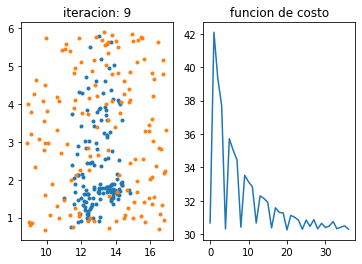

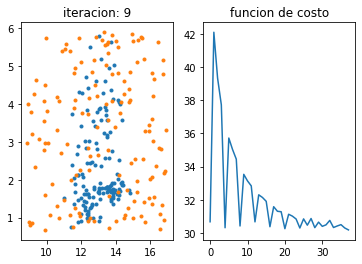

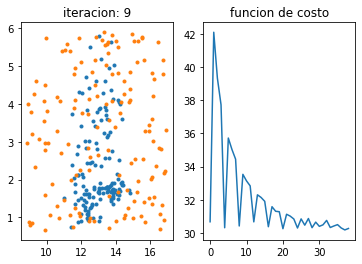

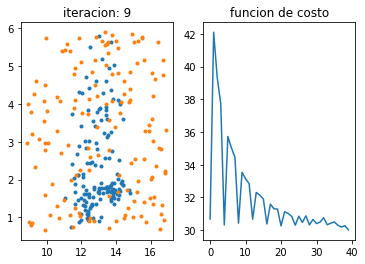

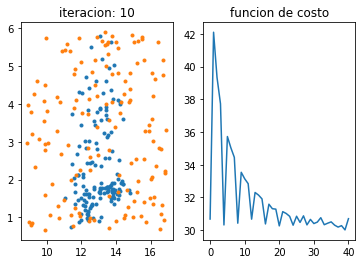

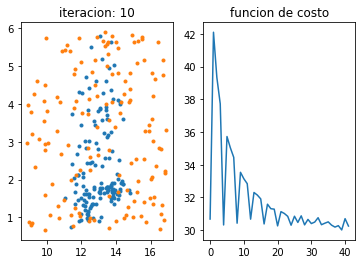

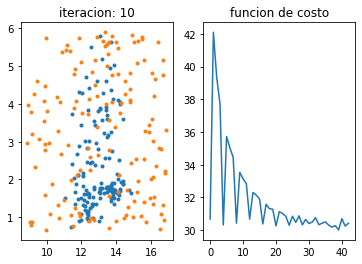

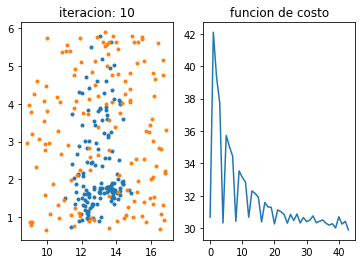

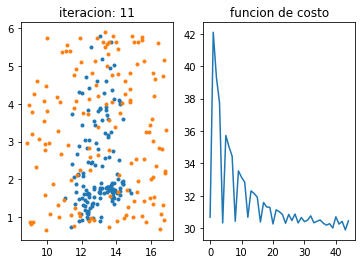

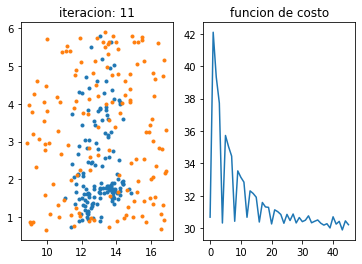

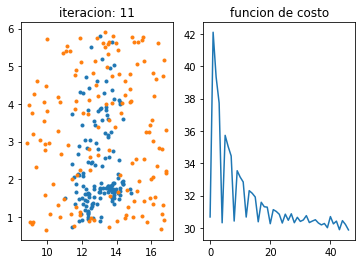

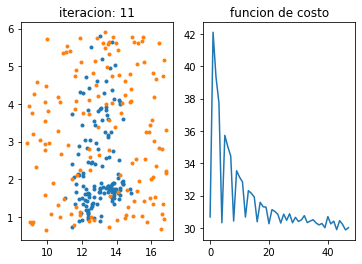

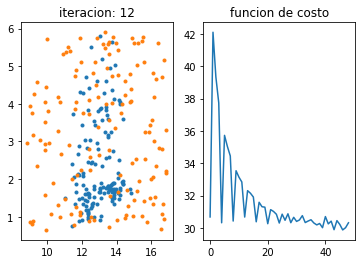

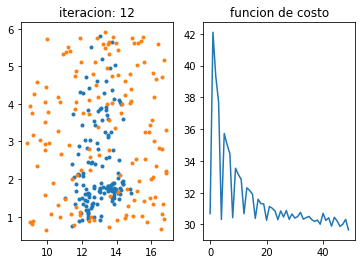

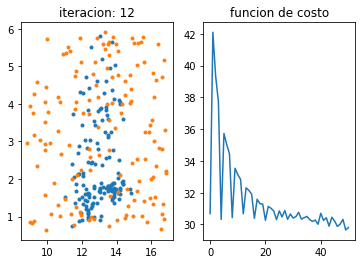

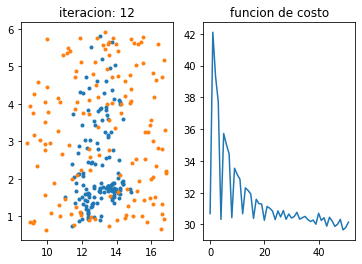

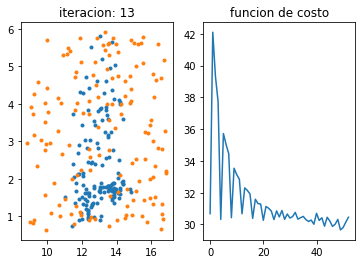

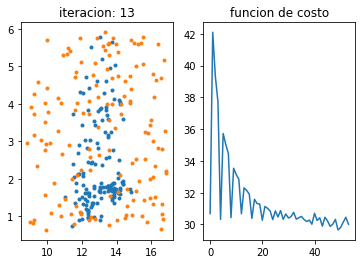

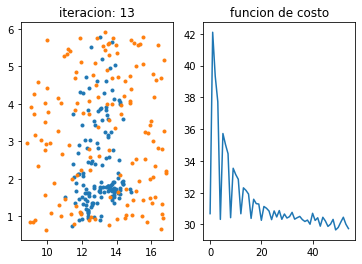

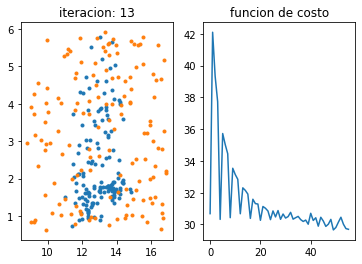

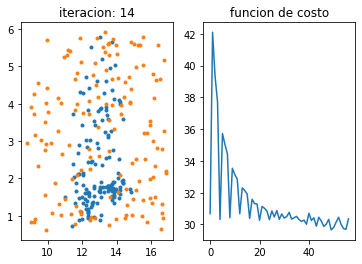

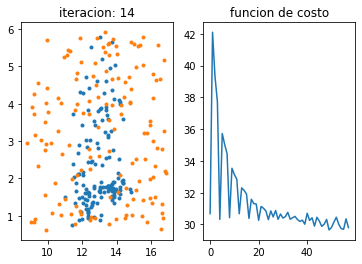

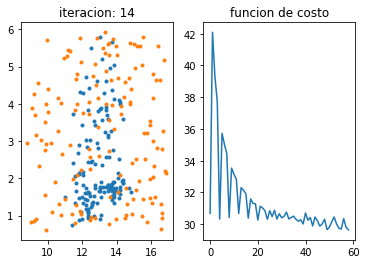

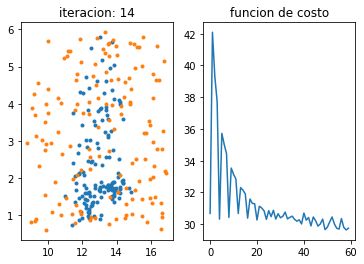

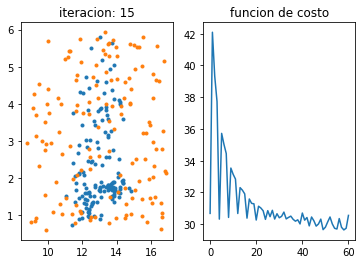

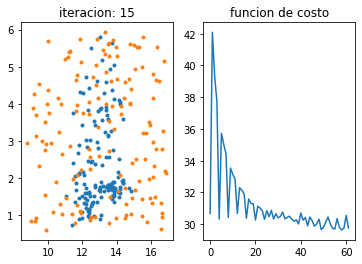

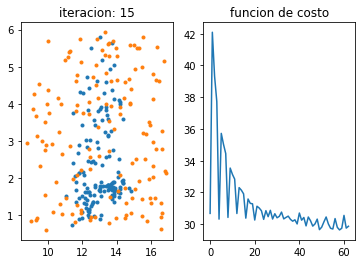

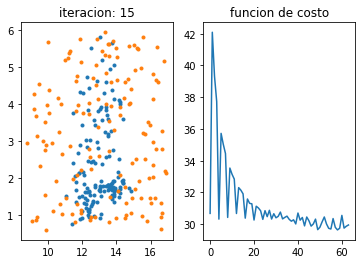

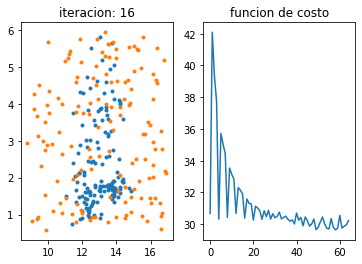

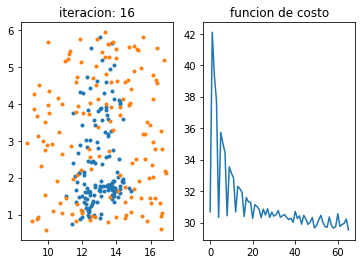

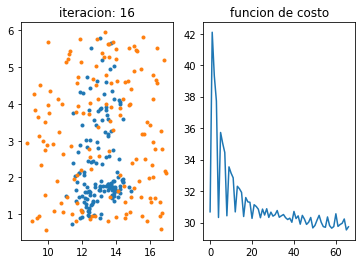

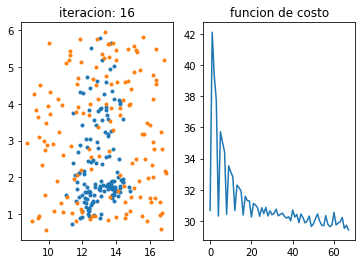

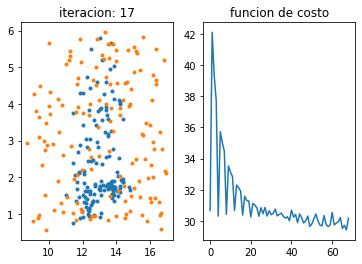

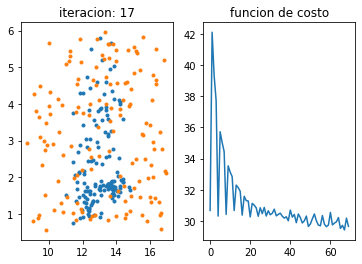

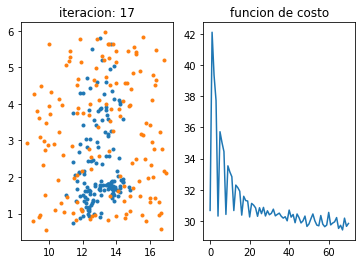

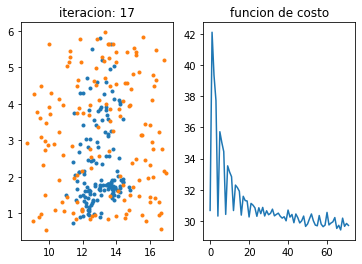

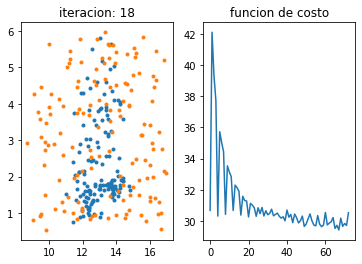

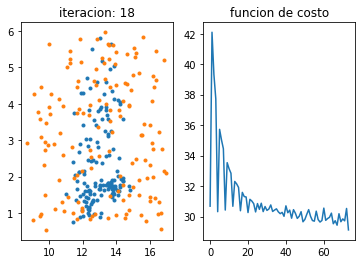

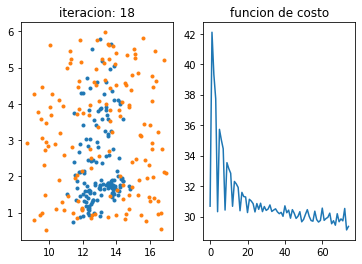

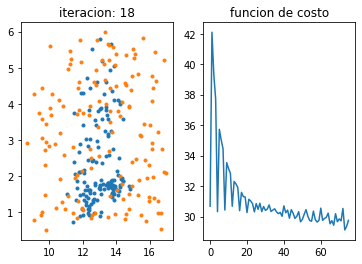

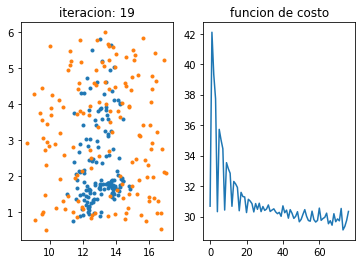

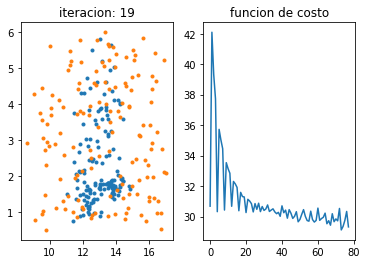

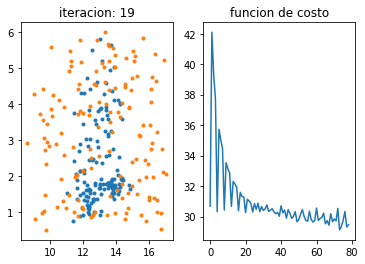

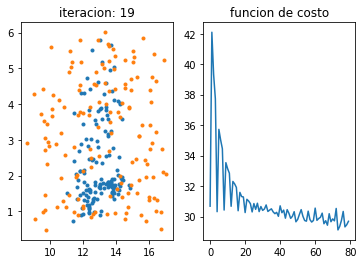

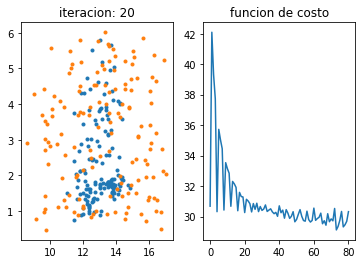

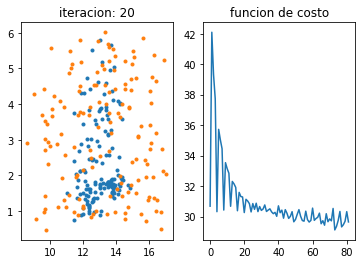

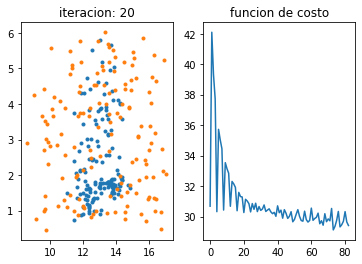

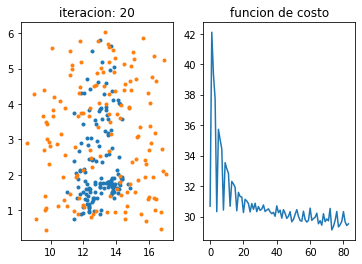

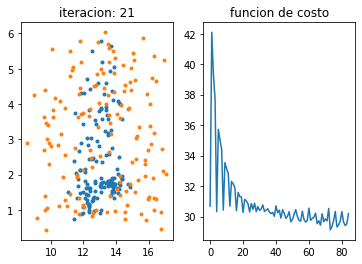

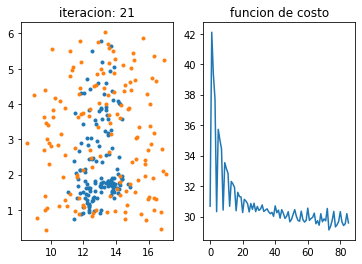

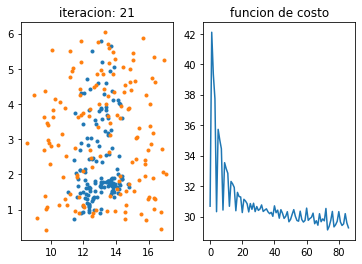

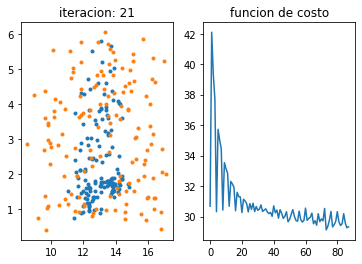

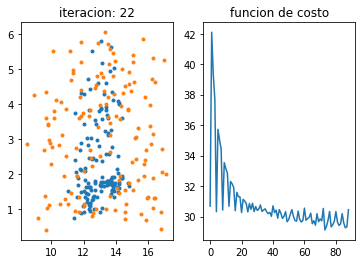

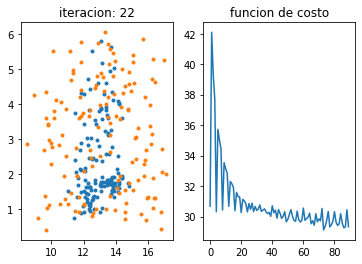

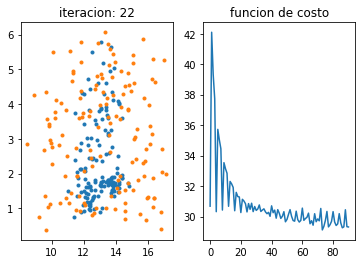

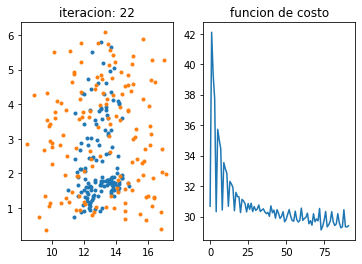

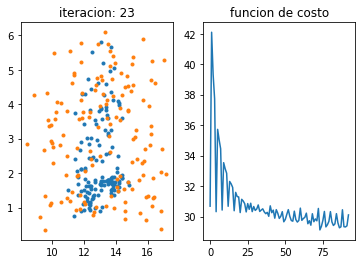

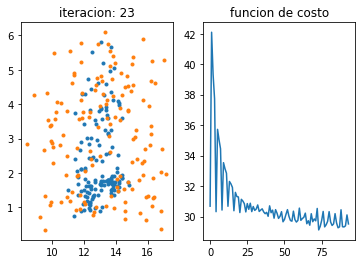

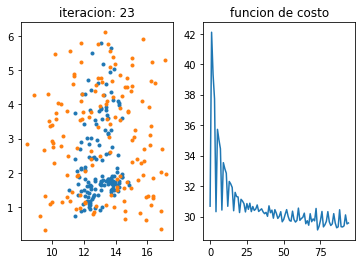

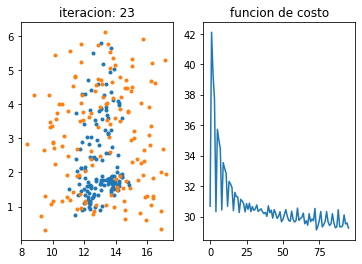

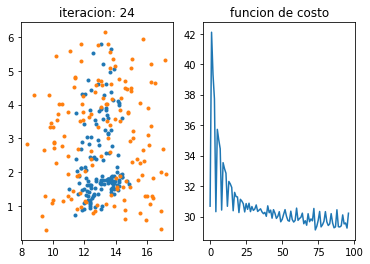

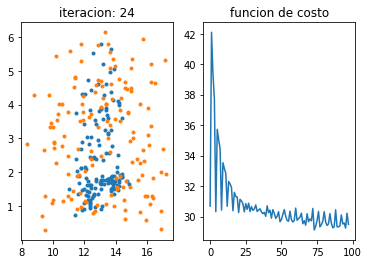

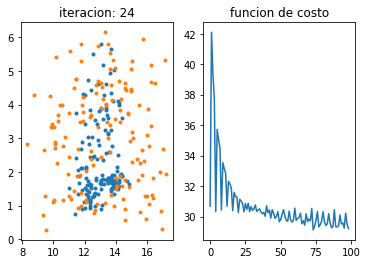

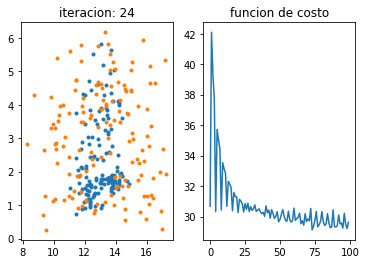

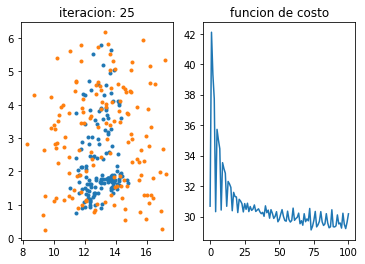

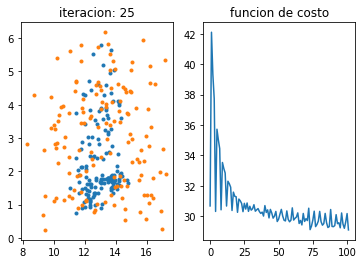

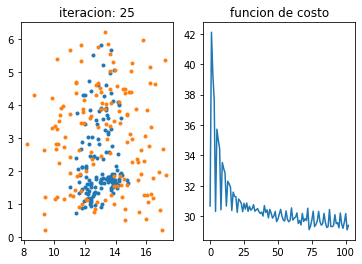

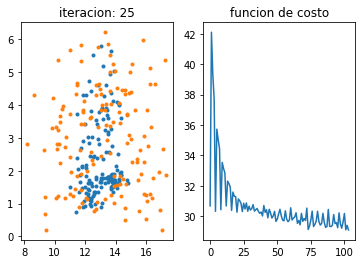

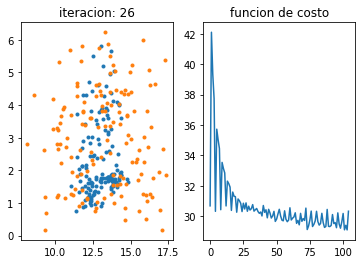

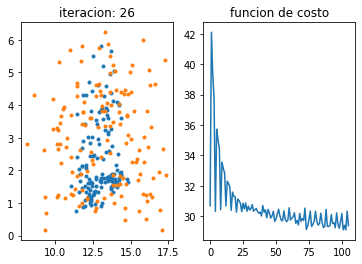

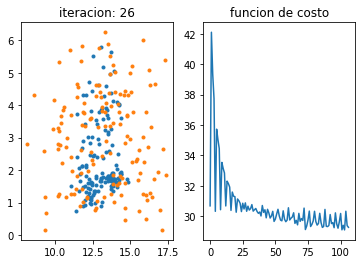

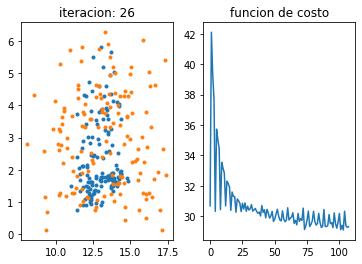

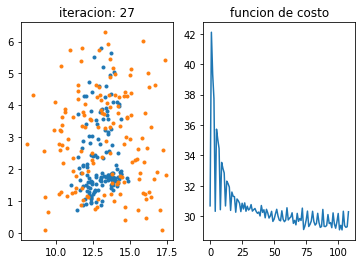

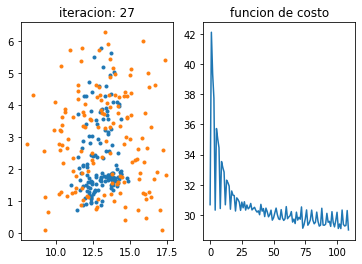

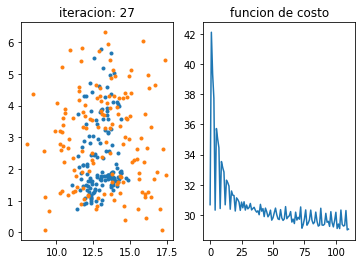

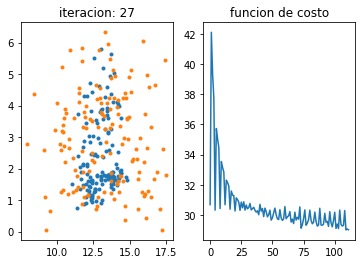

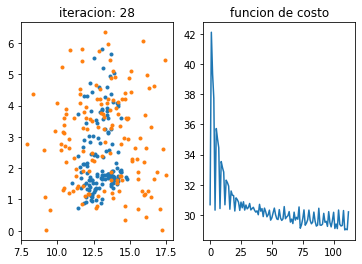

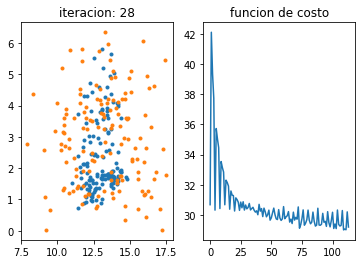

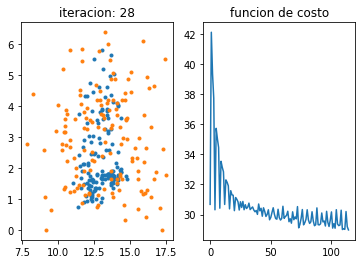

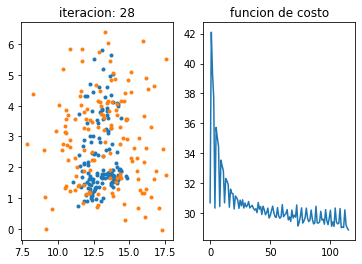

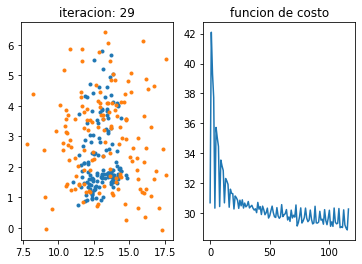

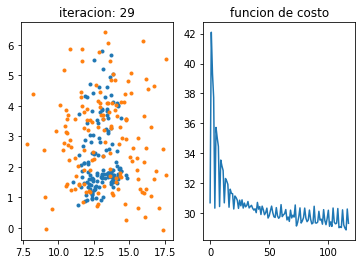

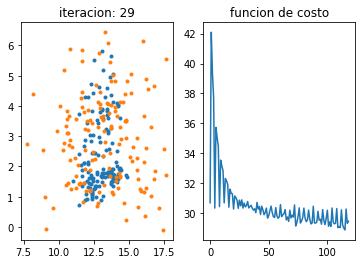

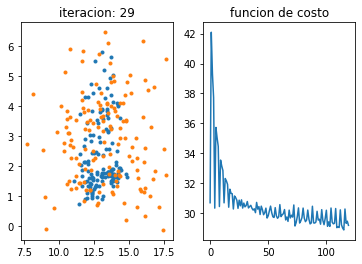

el tiempo requerido fue:39.309640884399414sg
Ari: 0.0 y accuracy: 0.3888888888888889
Jacc: 0.15123456790123457 y Purity: 0.3888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [0]:
t = time.time()
p =MiniBatchPRI(lambda_=3, sigma_initial=30,learning_rate=100.5, reduction_='SC',n_clusters=3,gamma_=10,nn=5,show_process=True)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
# ARI
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
# Accuracy
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
# Jaccard
Rjacc_SGD=jaccard_score(y_test,labels_pre_SGD,average='weighted')
# Purity
Rpuri_SGD=purity_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
print('Jacc: '+str(Rjacc_SGD)+' y'+' Purity: '+str(Rpuri_SGD))